In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
foo = pd.read_csv("CKD_Preprocessed.csv")
foo.head(n=10)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.316581,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,74.000000,25.0,1.1,142.0,3.2,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,100.000000,54.0,24.0,104.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,24.0,60.0,1.015,2.0,4.0,410.000000,31.0,1.1,138.0,4.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,138.000000,60.0,1.9,135.0,5.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,70.000000,107.0,7.2,114.0,3.7,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [3]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea (mgs/dL)             400 non-null    float64
 7   Serum Creatinine (mgs/dL)       400 non-null    float64
 8   Sodium (mEq/L)                  400 non-null    float64
 9   Potassium (mEq/L)               400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

In [4]:
foo.isnull().sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Red Blood Cells: normal           0
Pus Cells: normal                 0
Pus Cell Clumps: present          0
Bacteria: present                 0
Hypertension: yes                 0
Diabetes Mellitus: yes            0
Coronary Artery Disease: yes      0
Appetite: poor                    0
Pedal Edema: yes                  0
Anemia: yes                       0
Chronic Kidney Disease: yes       0
dtype: int64

In [5]:
foo.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.591123,76.300000,1.017449,0.935797,0.395000,146.005923,56.806872,3.022922,137.387860,4.569293,...,0.800000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,17.042814,13.593084,0.005597,1.311653,1.040038,76.422249,49.808436,5.631037,9.273123,2.829638,...,0.400501,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.900000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,119.491153,41.000000,1.300000,138.000000,4.400000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,159.250000,65.250000,2.800000,141.000000,4.900000,...,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
foo.loc[foo.duplicated()]

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Pus Cells: normal,Pus Cell Clumps: present,Bacteria: present,Hypertension: yes,Diabetes Mellitus: yes,Coronary Artery Disease: yes,Appetite: poor,Pedal Edema: yes,Anemia: yes,Chronic Kidney Disease: yes


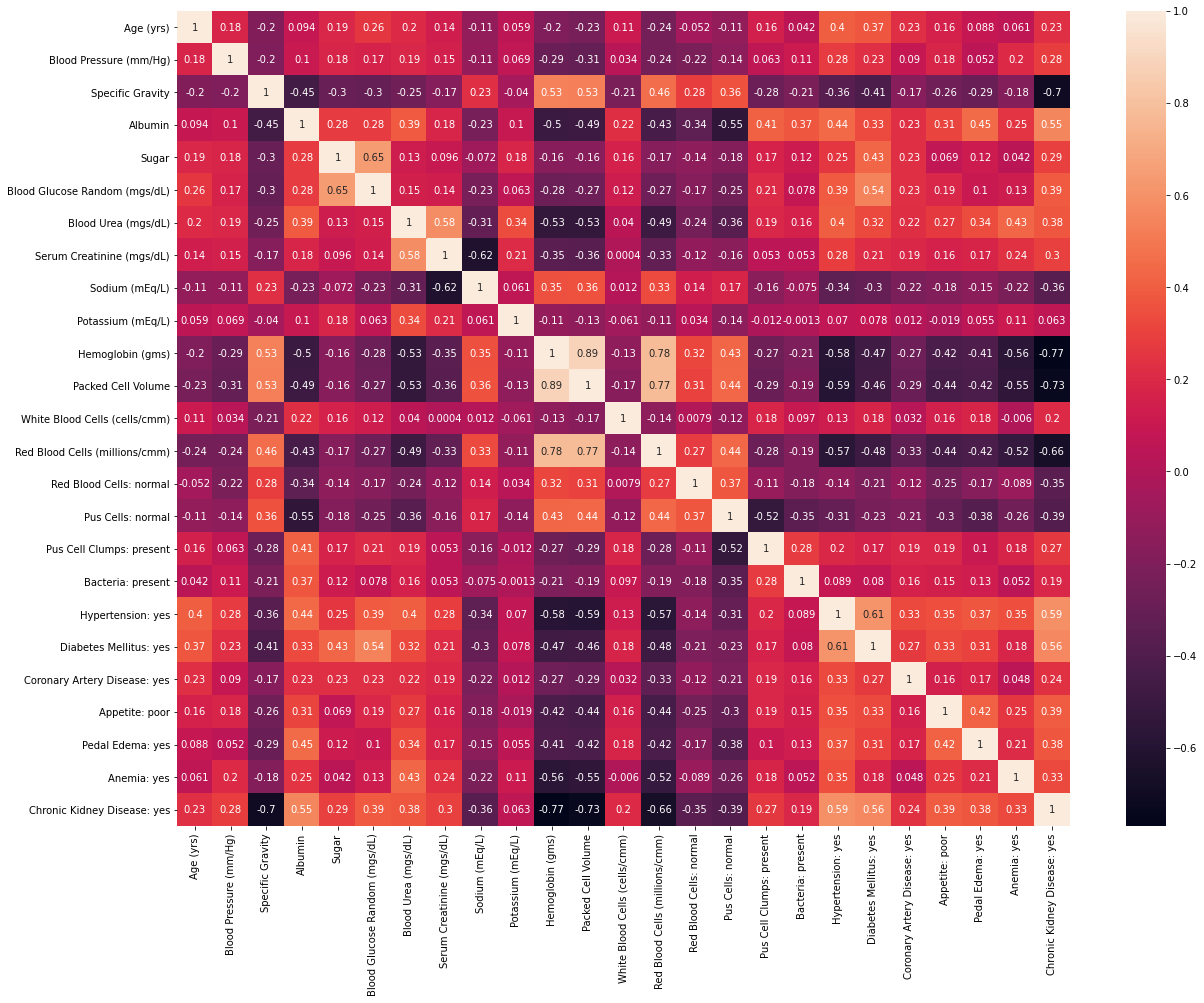

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(foo.corr(), annot=True)
plt.show()

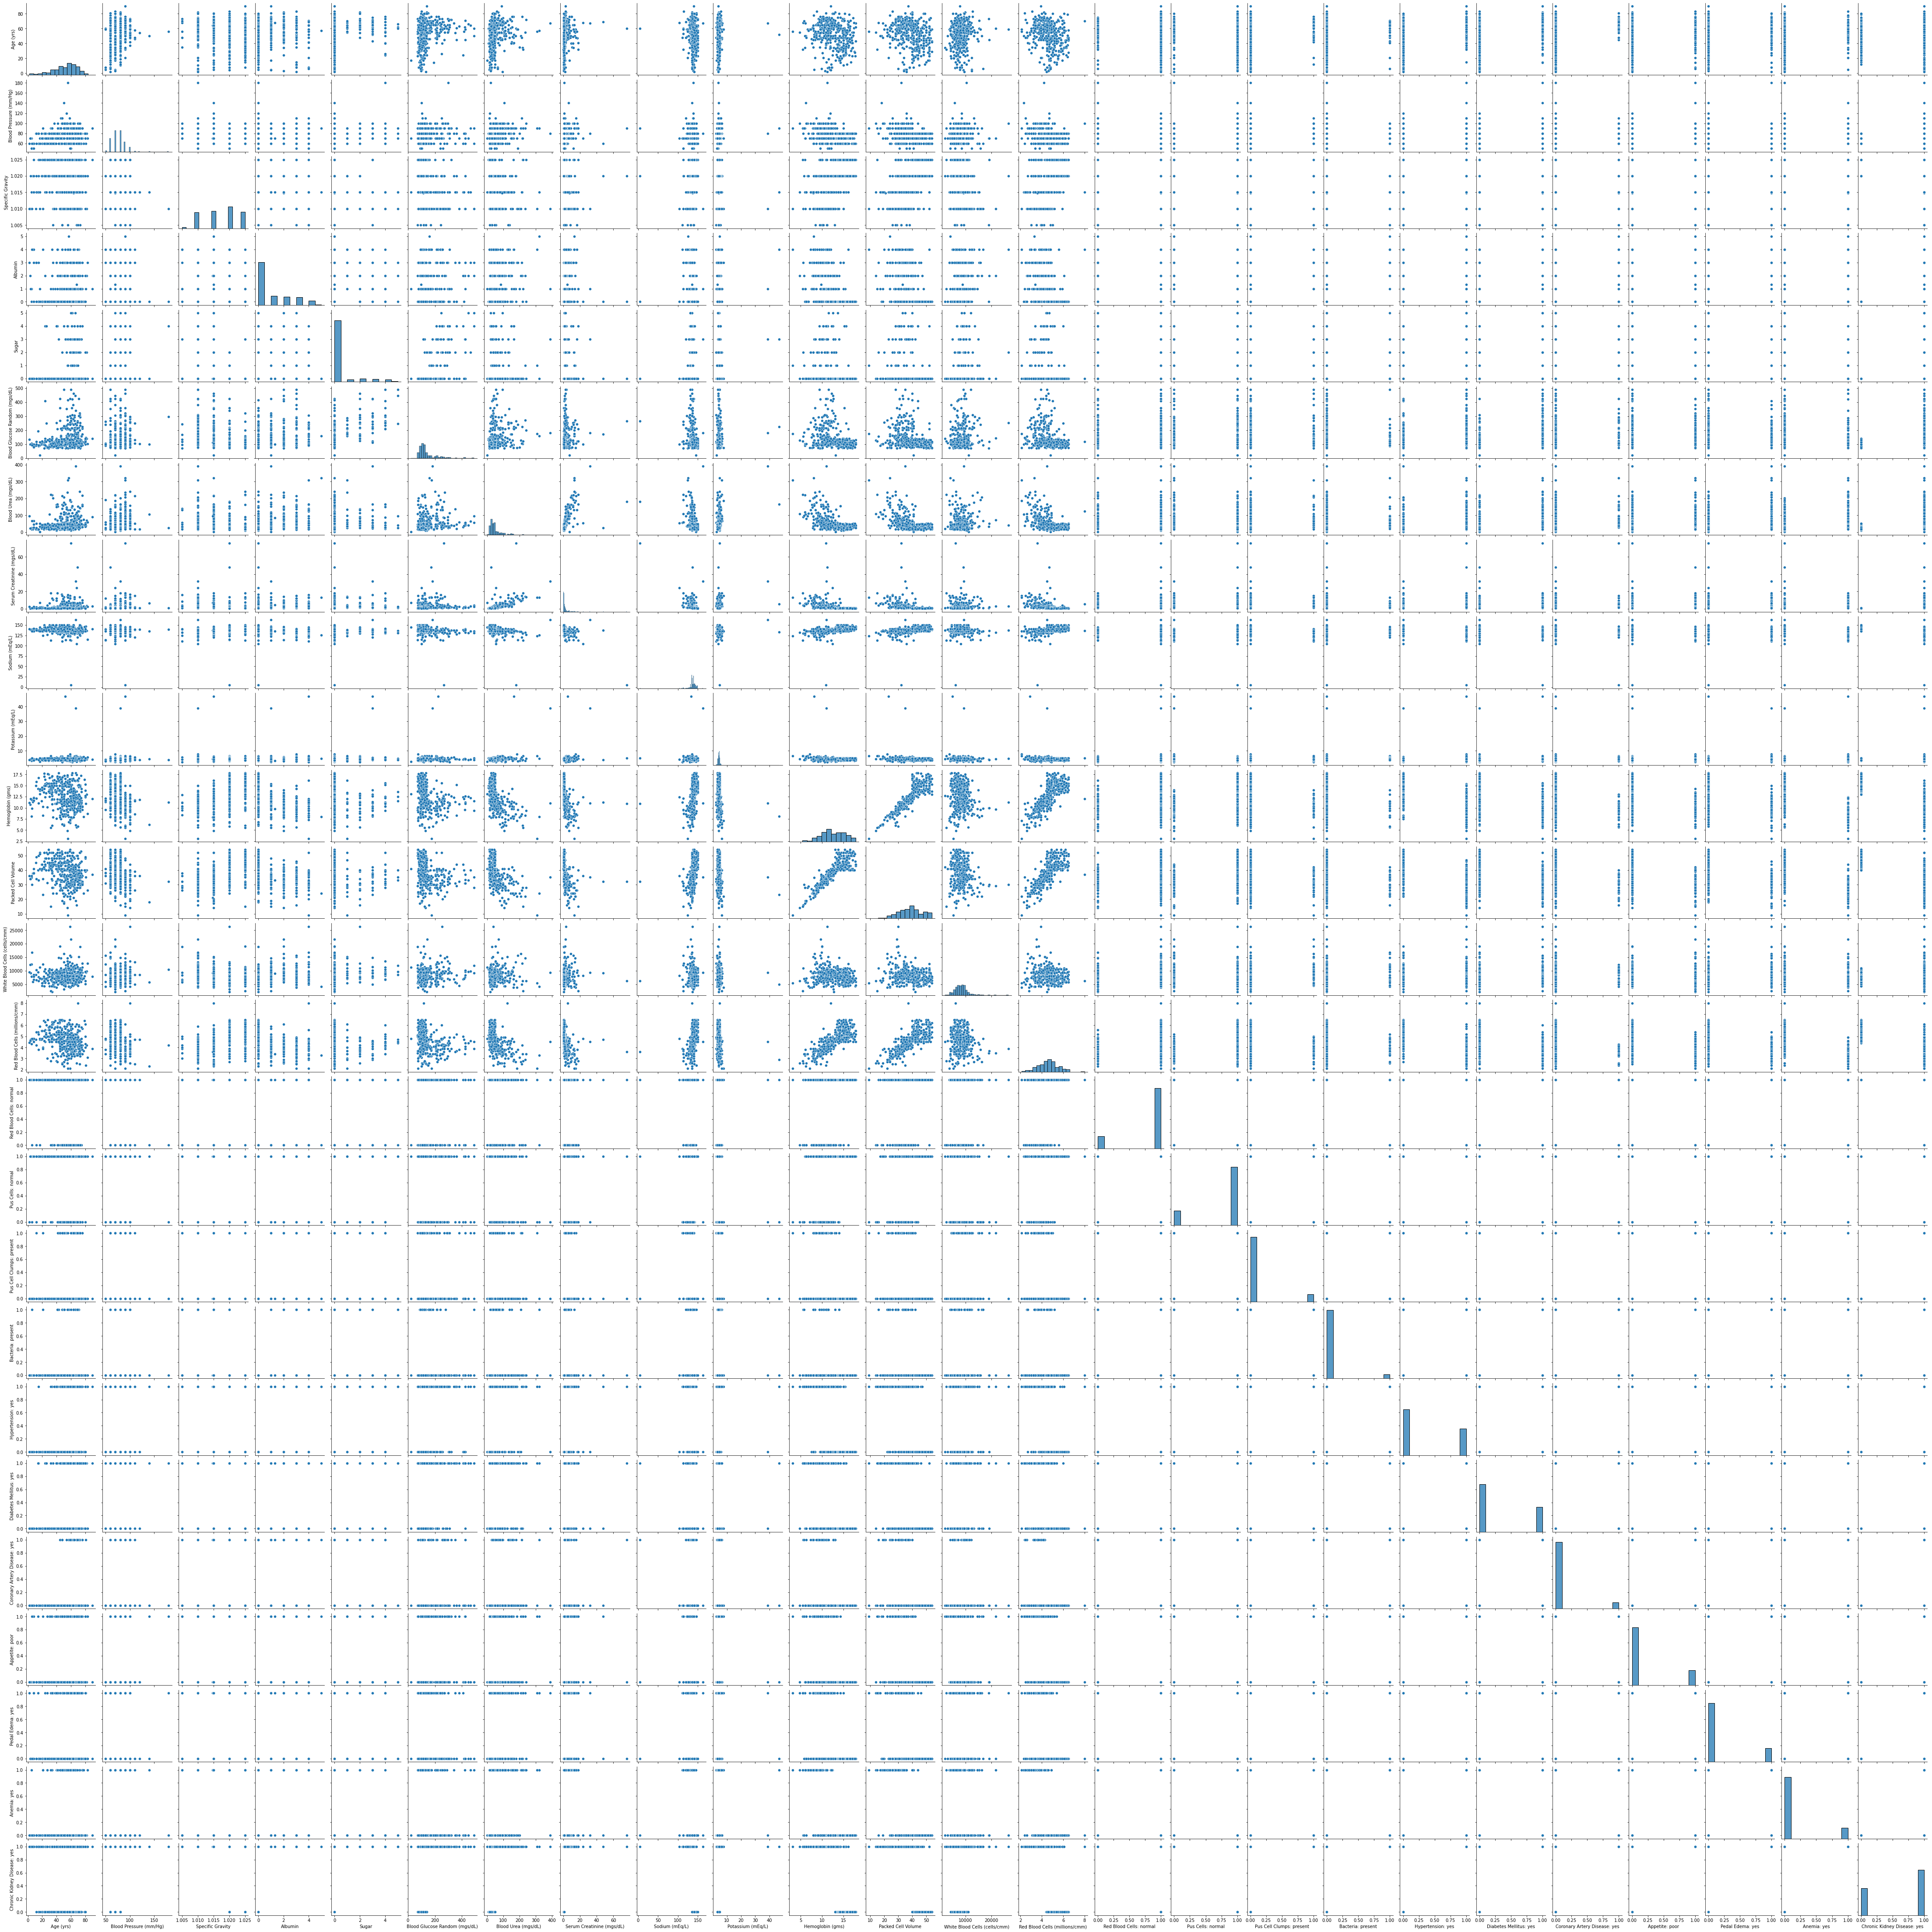

In [8]:
sns.pairplot(data=foo)

In [9]:
X = foo.iloc[:,0:24]
y = foo.iloc[:,-1]

In [10]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func = chi2, k=15)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score'))

                            Specs         Score
12  White Blood Cells (cells/cmm)  13073.125967
6             Blood Urea (mgs/dL)   2458.726431
5   Blood Glucose Random (mgs/dL)   2424.280144
11             Packed Cell Volume    395.566917
7       Serum Creatinine (mgs/dL)    369.487978
3                         Albumin    224.591172
10               Hemoglobin (gms)    148.216839
0                       Age (yrs)    119.640587
4                           Sugar     94.800000
18              Hypertension: yes     88.200000
19         Diabetes Mellitus: yes     82.200000
1          Blood Pressure (mm/Hg)     77.591962
21                 Appetite: poor     49.200000
22               Pedal Edema: yes     45.600000
23                    Anemia: yes     36.000000


In [11]:
foo.rename({'Chronic Kidney Disease: yes':'CKD'},axis=1, inplace=True)

In [12]:
features = ['White Blood Cells (cells/cmm)','Blood Urea (mgs/dL)','Blood Glucose Random (mgs/dL)','Packed Cell Volume','Serum Creatinine (mgs/dL)','Albumin','Hemoglobin (gms)','Age (yrs)','Sugar','Hypertension: yes']
X = foo[features]
y = foo.CKD
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state = 42)

In [13]:
knn=KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [14]:
knn.score(X_test,y_test)

0.75

In [15]:
model1 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=20))
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=20))])

In [16]:
model1.score(X_test, y_test)

0.975

In [17]:
from sklearn.ensemble import RandomForestRegressor
model2 = make_pipeline(StandardScaler(),RandomForestRegressor())
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [18]:
model2.score(X_test, y_test)

0.9763406593406594

In [19]:
prediction1 = knn.predict([['7800.0','36.0','121.0','44.0','1.2','1.0','15.4','48.0','0.0','1.0']])
prediction1[0]

1.0

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [21]:
model2 = make_pipeline(StandardScaler(),PCA(n_components=.95), LogisticRegression())
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [22]:
model2.score(X_test, y_test)

1.0

In [23]:
prediction1[0]

1.0